# KNN

In [7]:
import pandas as pd
train = pd.read_csv('../../../dataset/german_credit_train.csv')
train.head()

,Unnamed: 0,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,239,39,male,2,own,little,little,2522,30,radio/TV,good
1,304,44,male,2,free,quite rich,NaN,10127,48,car,bad
2,964,22,male,1,own,little,moderate,454,6,repairs,good
3,102,24,female,2,own,little,NaN,932,6,radio/TV,good
4,867,42,male,2,own,little,NaN,3331,12,furniture/equipment,good


In [8]:
df = train.drop(columns=['Unnamed: 0','risk'])
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
0,39,male,2,own,little,little,2522,30,radio/TV
1,44,male,2,free,quite rich,NaN,10127,48,car
2,22,male,1,own,little,moderate,454,6,repairs
3,24,female,2,own,little,NaN,932,6,radio/TV
4,42,male,2,own,little,NaN,3331,12,furniture/equipment


In [9]:
y_train = train['risk']

### Transformando dados categóricos em numéricos

In [10]:
cleanup_nums = {"savingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)

In [11]:
cleanup_nums = {"checkingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)

In [12]:
d_attr = pd.get_dummies(df[['sex','housing','purpose']], prefix=['sex','housing','purpose'])

In [13]:
print(d_attr.shape)
print(df.shape)

(900, 13)
(900, 9)


In [14]:
df = pd.concat([df, d_attr], axis=1)

In [15]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,sex_female,...,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,39,male,2,own,1.0,1.0,2522,30,radio/TV,0,...,1,0,0,0,0,0,0,1,0,0
1,44,male,2,free,3.0,NaN,10127,48,car,0,...,0,0,0,1,0,0,0,0,0,0
2,22,male,1,own,1.0,2.0,454,6,repairs,0,...,1,0,0,0,0,0,0,0,1,0
3,24,female,2,own,1.0,NaN,932,6,radio/TV,1,...,1,0,0,0,0,0,0,1,0,0
4,42,male,2,own,1.0,NaN,3331,12,furniture/equipment,0,...,1,0,0,0,0,0,1,0,0,0


In [16]:
df.shape

(900, 22)

In [17]:
df.columns

Index(['age', 'sex', 'job', 'housing', 'savingAccount', 'checkingAccount',
       'creditAmount', 'duration', 'purpose', 'sex_female', 'sex_male',
       'housing_free', 'housing_own', 'housing_rent', 'purpose_business',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others'],
      dtype='object')

In [18]:
df = df[['age', 'savingAccount', 'checkingAccount',
       'creditAmount', 'duration', 'sex_female', 'sex_male',
       'housing_free', 'housing_own', 'housing_rent', 'purpose_business',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others']]

In [19]:
df.shape

(900, 18)

### Tratamento dos valores missing - atribuindo o valor mais frequente para os valores missing
savingAccount = 1 e checkingAccount = 1

In [20]:
df = df.fillna(1)
df.head()

,age,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,39,1.0,1.0,2522,30,0,1,0,1,0,0,0,0,0,0,1,0,0
1,44,3.0,1.0,10127,48,0,1,1,0,0,0,1,0,0,0,0,0,0
2,22,1.0,2.0,454,6,0,1,0,1,0,0,0,0,0,0,0,1,0
3,24,1.0,1.0,932,6,1,0,0,1,0,0,0,0,0,0,1,0,0
4,42,1.0,1.0,3331,12,0,1,0,1,0,0,0,0,0,1,0,0,0


### Normalizando todos os valores

In [21]:
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df = pd.DataFrame(
    min_max_scaler.fit_transform(df),
    index=df.index,
    columns=df.columns
)

In [22]:
df.head()

,age,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,0.357143,0.000000,0.000000,0.125014,0.382353,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.446429,0.666667,0.000000,0.543469,0.647059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.053571,0.000000,0.333333,0.011225,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.089286,0.000000,0.000000,0.037526,0.029412,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.410714,0.000000,0.000000,0.169528,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Escolhendo os melhores hiperparâmetros para o Knn

In [23]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
result = []
for i in range(1,60):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(df, y_train)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(modelK, df, y_train, cv=5, scoring=s)
    f1 = scores.mean()
    result.append((i, f1))

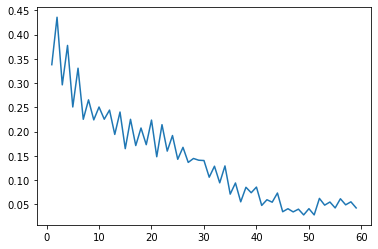

In [26]:
import matplotlib.pyplot as plt
plt.plot(*zip(*result))

In [27]:
result[0:5]

[(1, 0.3379060828718275),
 (2, 0.4357160043582774),
 (3, 0.29629757214934654),
 (4, 0.37760481064828894),
 (5, 0.25069433834139715)]

In [28]:
modelK = KNeighborsClassifier(n_neighbors=2)
modelK.fit(df, y_train)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, df, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, df, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

f1_score: 0.44 (+/- 0.03)


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

[[153 119]
 [278 350]]
              precision    recall  f1-score   support

         bad       0.35      0.56      0.44       272
        good       0.75      0.56      0.64       628

    accuracy                           0.56       900
   macro avg       0.55      0.56      0.54       900
weighted avg       0.63      0.56      0.58       900

